In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv'
experiment_data = pd.read_csv(PATH)

In [3]:
experiment_data.head(3)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN


In [4]:
# How large is each group?
groups = experiment_data.groupby(['test'])
print(groups.size())

# What is the signup rate of test and control?
print(experiment_data[experiment_data['test'] == 1].is_signed_up.mean())
print(experiment_data[experiment_data['test'] == 0].is_signed_up.mean())


# Is the experiment already significant?
stats.ttest_ind(experiment_data[experiment_data['test'] == 1].is_signed_up, experiment_data[experiment_data['test'] == 0].is_signed_up)

test
0    30241
1     3372
dtype: int64
0.13701067615658363
0.14708508316523924


Ttest_indResult(statistic=-1.5711354292574262, pvalue=0.11616060761145311)

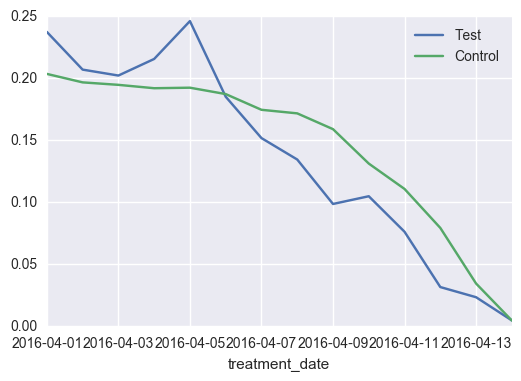

In [23]:
# Let's see what might be wrong.

graph = experiment_data[experiment_data['test'] == 1][['treatment_date', 'is_signed_up']].groupby(['treatment_date']).mean().plot()
experiment_data[experiment_data['test'] == 0][['treatment_date', 'is_signed_up']].groupby(['treatment_date']).mean().plot(ax=graph)
plt.legend(['Test', 'Control'])

## Why use ttest?

- It allows you to understand if a test is significant. 
- Best used when you have low data (sample size < 30)
- Here we use ttest because we're bucketing by day!

How to read a ttest?

`statistic=1.171015382328547, pvalue=0.24172432121696255`

- statistic = it substitutes for standard deviation. basically the higher this is, the better.
- pvalue = probablity that this result occured by chance. For the t distribution we want the p value to be **at, or below, 0.01**
  - See more [here](http://www.dummies.com/education/math/statistics/how-to-use-the-t-table-to-solve-statistics-problems/)
  
## Coming next...

We may look at confidence intervals in the future!

In [29]:
for date in experiment_data.treatment_date.unique():
    dated_data = experiment_data[experiment_data.treatment_date == date]
    print(stats.ttest_ind(dated_data[dated_data.test == 1].is_signed_up,
                          dated_data[dated_data.test == 0].is_signed_up))

Ttest_indResult(statistic=1.171015382328547, pvalue=0.24172432121696255)
Ttest_indResult(statistic=0.39163213374090855, pvalue=0.69536307583404477)
Ttest_indResult(statistic=0.24114731791032132, pvalue=0.80946517427234477)
Ttest_indResult(statistic=1.0061466712652529, pvalue=0.31442818877672118)
Ttest_indResult(statistic=1.7950152227404037, pvalue=0.072795024323400598)
Ttest_indResult(statistic=-0.071422569493390833, pvalue=0.94306811838128213)
Ttest_indResult(statistic=-0.99645401324533001, pvalue=0.31911047625459077)
Ttest_indResult(statistic=-1.4059315672051254, pvalue=0.15989309224108991)
Ttest_indResult(statistic=-2.7727725116434869, pvalue=0.0055926512303104605)
Ttest_indResult(statistic=-1.301097855458891, pvalue=0.19332775805677105)
Ttest_indResult(statistic=-1.6243695706046337, pvalue=0.10443285596458776)
Ttest_indResult(statistic=-2.5595402548533168, pvalue=0.010550250694229046)
Ttest_indResult(statistic=-0.85179312629079196, pvalue=0.39442121215359549)
Ttest_indResult(statis

In [55]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_final.csv'
experiment_data = pd.read_csv(PATH)
len(experiment_data)

66728

In [59]:
# How large is each group?
print("Test sample size: ", len(experiment_data[experiment_data['test'] == 1]))
print("Control sample size", len(experiment_data[experiment_data['test'] == 0]))
print("Test proportion", experiment_data.test.mean())

# What is the signup rate of test and control?
print("Test signup rate", experiment_data[experiment_data['test'] == 1]['is_signed_up'].mean())
print("Control signup rate", experiment_data[experiment_data['test'] == 0]['is_signed_up'].mean())

# Is the experiment already significant?
stats.ttest_ind(
        experiment_data[experiment_data['test'] == 1]['is_signed_up'],
        experiment_data[experiment_data['test'] == 0]['is_signed_up'])

Test sample size:  19861
Control sample size 46867
Test proportion 0.2976411701234864
Test signup rate 0.2421328231206888
Control signup rate 0.19937269293959503


Ttest_indResult(statistic=12.368130184147793, pvalue=4.2481677149116848e-35)

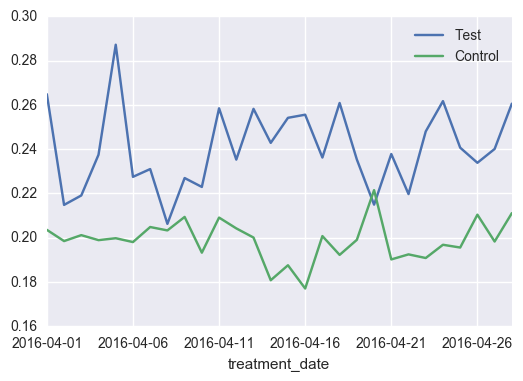

In [54]:
graph = experiment_data[experiment_data['test'] == 1][['treatment_date', 'is_signed_up']].groupby(['treatment_date']).mean().plot()
experiment_data[experiment_data['test'] == 0][['treatment_date', 'is_signed_up']].groupby(['treatment_date']).mean().plot(ax=graph)
plt.legend(['Test', 'Control'])